In [1]:
# Install Required Libraries

!python -m pip install -qU pip
!python -m pip install -qU numpy matplotlib seaborn pandas scikit-learn geopy tqdm

print('Library Installation Successful')

Library Installation Successful


In [2]:
# Import Required Libraries

import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
import pandas as pd

import seaborn as sns; sns.set()

# %matplotlib inline

print('Numpy:         {}'.format(np.__version__))
print('Matplotlib:    {}'.format(plt.matplotlib.__version__))

import sklearn
print('Scikit-Learn:  {}'.format(sklearn.__version__))
del sklearn

print('Numpy:         {}'.format(pd.__version__))

Numpy:         1.21.2
Matplotlib:    3.4.3
Scikit-Learn:  0.24.2
Numpy:         1.3.3


In [3]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [4]:
import time
from tqdm import tqdm

df = pd.read_csv('df5.csv',
                parse_dates=['date_onset_symptoms', 'date_admission_hospital', 'date_confirmation'],
                dtype={
                        'city': 'string',
                        'province': 'string',
                        'country': 'string',
                    }
                )

df_isna = df.isna()

for i in tqdm(range(len(df))):
    if df_isna.province.iloc[i] == True or df_isna.city.iloc[i] == True:
        while True:
            try:
                location = geolocator.reverse("{},{}".format(df.latitude.iloc[i], df.longitude.iloc[i]), language='en')
                break
            except:
                time.sleep(2)
        
        if location:
            address = location.raw['address']
        
            # traverse the data
            city = address.get('city', '')
            state = address.get('state', '')
            country = address.get('country', '')
            
            if df_isna.province.iloc[i] == True:
                df.province.iloc[i] = state
            
            if df_isna.city.iloc[i] == True:
                df.city.iloc[i] = city

    if df_isna.date_confirmation.iloc[i] == True:
        df.date_confirmation.iloc[i] = df.date_admission_hospital.iloc[i] + timedelta(14)

df.info()

df

  0%|          | 196/235496 [00:25<6:07:33, 10.67it/s]d:\PROJECT\College Project\DOPTEC\.doptec\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████| 235496/235496 [23:15<00:00, 168.69it/s] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235496 entries, 0 to 235495
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   city                     235494 non-null  string        
 1   province                 235496 non-null  string        
 2   country                  235496 non-null  string        
 3   latitude                 235496 non-null  float64       
 4   longitude                235496 non-null  float64       
 5   date_onset_symptoms      235496 non-null  datetime64[ns]
 6   date_admission_hospital  235496 non-null  datetime64[ns]
 7   date_confirmation        235496 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), string(3)
memory usage: 14.4 MB


,city,province,country,latitude,longitude,date_onset_symptoms,date_admission_hospital,date_confirmation
0,"Dongliao County, Liaoyuan City",Jilin,China,42.944450,125.176200,2020-08-02,2020-08-22,2020-02-14
1,"Pixel Park, Economic Development Zone, Jinkai ...",Jilin,China,43.847947,125.412405,2020-03-13,2020-04-02,2020-02-13
2,"Shuangliao City, Siping City",Jilin,China,43.759480,123.695600,2020-01-02,2020-01-30,2020-02-13
3,"Sunac City, Shangcheng, Changchun City",Jilin,China,43.829610,125.259240,2020-01-25,2020-02-14,2020-02-15
4,Yokohama Port,Kanagawa Prefecture,Japan,35.450850,139.665100,2020-02-14,2020-02-17,2020-02-16
...,...,...,...,...,...,...,...,...
235491,Villavicencio,Meta,Colombia,4.150000,-73.633333,2020-04-16,2020-05-06,2020-04-19
235492,Villavicencio,Meta,Colombia,4.150000,-73.633333,2020-04-17,2020-05-07,2020-04-19
235493,Villavicencio,Meta,Colombia,4.150000,-73.633333,2020-04-16,2020-05-06,2020-04-19
235494,Villavicencio,Meta,Colombia,4.150000,-73.633333,2020-04-19,2020-05-09,2020-04-19


In [6]:
df.to_csv('df6.csv', index=False)

In [7]:
df.isna().sum()

city                       2
province                   0
country                    0
latitude                   0
longitude                  0
date_onset_symptoms        0
date_admission_hospital    0
date_confirmation          0
dtype: int64

In [17]:
df.country.values.unique()

<StringArray>
[         'China',          'Japan',      'Singapore',    'South Korea',
       'Malaysia',          'Italy',        'Finland',         'Canada',
       'Pakistan',       'Thailand',          'Spain',  'United States',
        'Romania',       'Cambodia',        'Germany', 'United Kingdom',
      'Australia',    'Philippines',         'Bhutan',         'France',
         'Brazil',    'Switzerland',        'Vietnam',        'Algeria',
        'Namibia',        'Nigeria',     'Kazakhstan',          'India',
        'Bolivia',      'Guatemala',         'Mexico',          'Chile',
           'Cuba',       'Colombia',      'Argentina']
Length: 35, dtype: string

In [18]:
for country in df.country.values.unique():
    df_country = df[df.country == country]
    print('{} -> {}'.format(country, len(df_country)))

China -> 1210
Japan -> 338
Singapore -> 246
South Korea -> 92
Malaysia -> 4
Italy -> 5
Finland -> 2
Canada -> 34
Pakistan -> 4
Thailand -> 16
Spain -> 1
United States -> 42
Romania -> 5
Cambodia -> 2
Germany -> 176930
United Kingdom -> 4
Australia -> 44
Philippines -> 6913
Bhutan -> 2
France -> 9
Brazil -> 61
Switzerland -> 2
Vietnam -> 22
Algeria -> 9
Namibia -> 1
Nigeria -> 3
Kazakhstan -> 2
India -> 3
Bolivia -> 6
Guatemala -> 10
Mexico -> 552
Chile -> 2
Cuba -> 257
Colombia -> 33565
Argentina -> 15098


In [12]:
for country in df.country.values.unique():
    df_country = df[df.country == country]

    for province in df_country.province.values.unique():

        print('{} - {} -> # Records = {}'.format(province, country, (df_country.province == province).sum()))

Jilin - China -> # Records = 12
Yunnan - China -> # Records = 70
Hainan - China -> # Records = 108
Guangxi - China -> # Records = 68
Anhui - China -> # Records = 170
Hong Kong - China -> # Records = 66
Shanxi - China -> # Records = 4
Gansu - China -> # Records = 130
Shaanxi - China -> # Records = 204
Beijing - China -> # Records = 98
Chongqing - China -> # Records = 2
Qinghai - China -> # Records = 26
Macau - China -> # Records = 8
Jiangxi - China -> # Records = 12
Sichuan - China -> # Records = 56
Guizhou - China -> # Records = 20
Tibet - China -> # Records = 2
Fujian - China -> # Records = 6
Guangdong - China -> # Records = 18
Hebei - China -> # Records = 2
Heilongjiang - China -> # Records = 4
Henan - China -> # Records = 16
Hunan - China -> # Records = 2
Inner Mongolia - China -> # Records = 8
Jiangsu - China -> # Records = 2
Liaoning - China -> # Records = 6
Ningxia - China -> # Records = 4
Shandong - China -> # Records = 6
Shanghai - China -> # Records = 2
Tianjin - China -> # Re

In [19]:
!python -m pip install -U pycountry_convert

Using legacy 'setup.py install' for pycountry, since package 'wheel' is not installed.
    Running setup.py install for pycountry: started
    Running setup.py install for pycountry: finished with status 'done'


In [22]:
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

data_dict = {}

for country in df.country.values.unique():
    continent = country_to_continent(country)

    if not data_dict.get(continent): data_dict[continent] = []
    data_dict[continent].append(country)

pd.DataFrame(data_dict)

{'Asia': ['China',
  'Japan',
  'Singapore',
  'South Korea',
  'Malaysia',
  'Pakistan',
  'Thailand',
  'Cambodia',
  'Philippines',
  'Bhutan',
  'Vietnam',
  'Kazakhstan',
  'India'],
 'Europe': ['Italy',
  'Finland',
  'Spain',
  'Romania',
  'Germany',
  'United Kingdom',
  'France',
  'Switzerland'],
 'North America': ['Canada', 'United States', 'Guatemala', 'Mexico', 'Cuba'],
 'Oceania': ['Australia'],
 'South America': ['Brazil', 'Bolivia', 'Chile', 'Colombia', 'Argentina'],
 'Africa': ['Algeria', 'Namibia', 'Nigeria']}

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

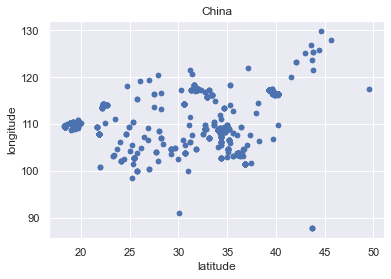

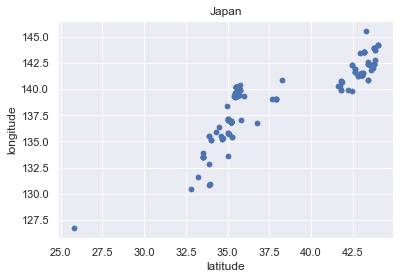

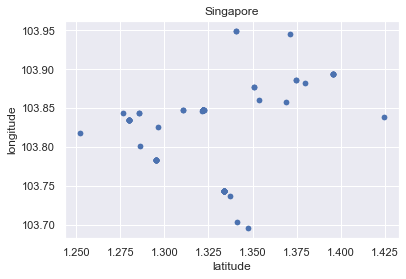

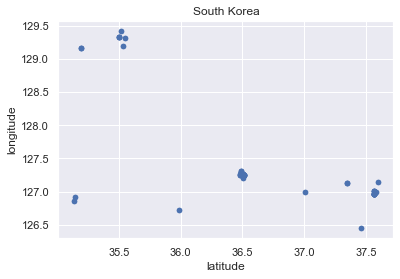

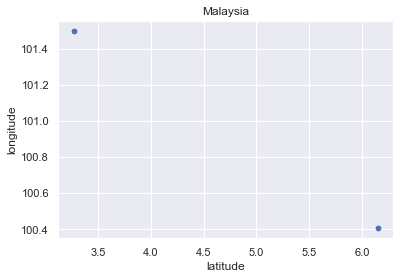

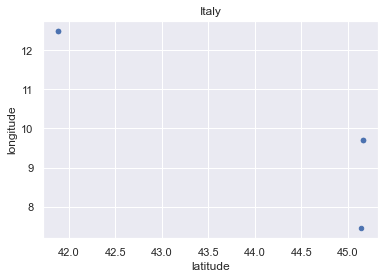

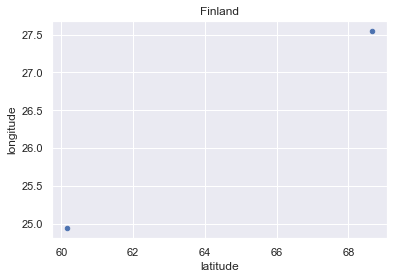

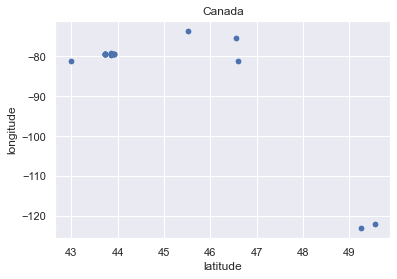

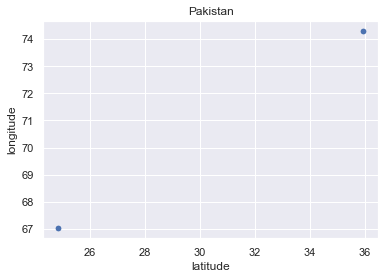

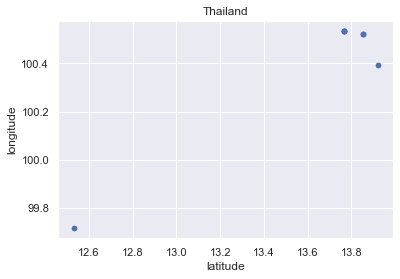

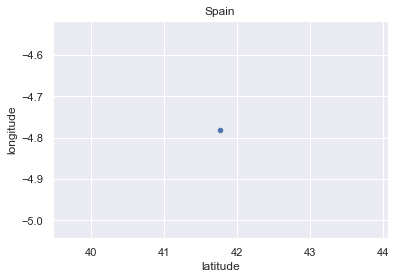

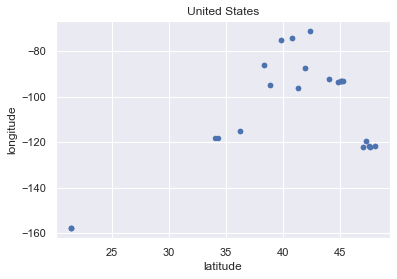

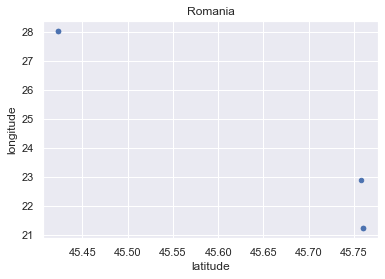

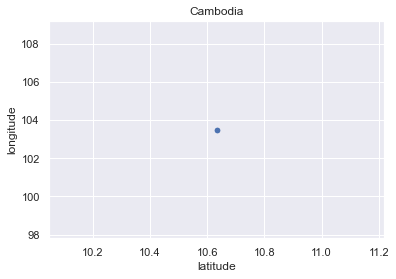

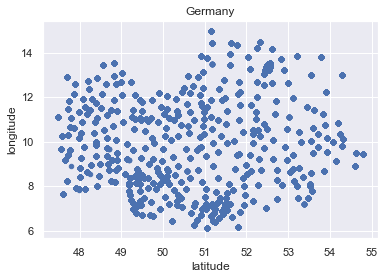

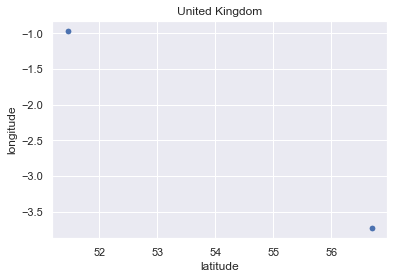

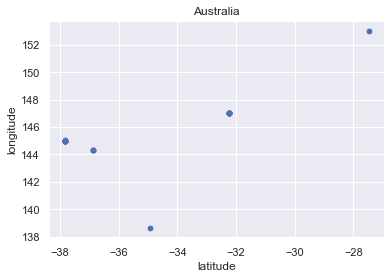

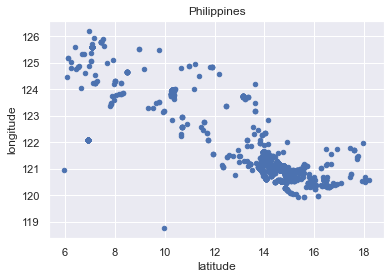

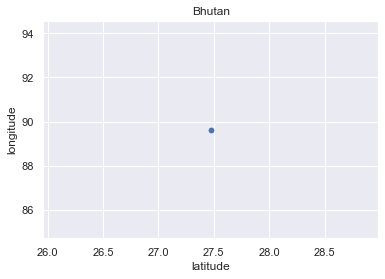

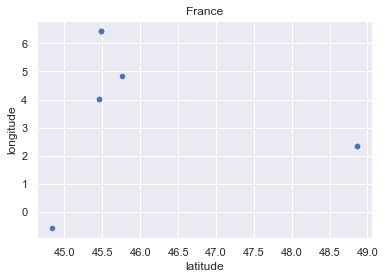

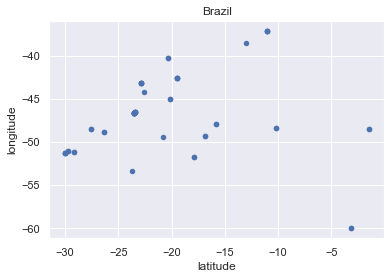

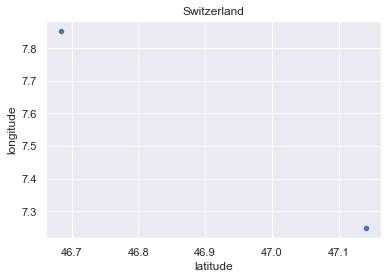

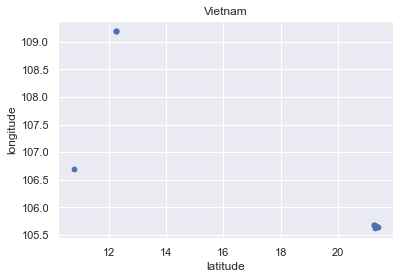

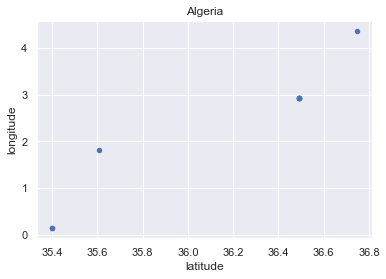

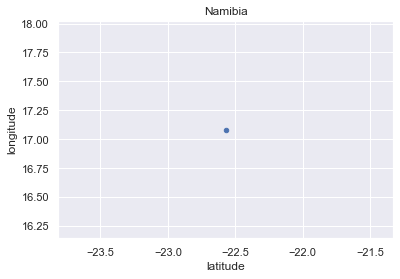

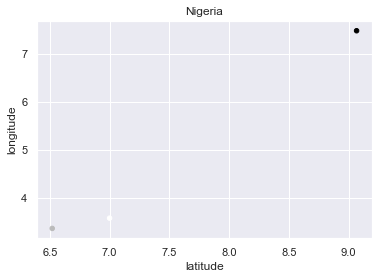

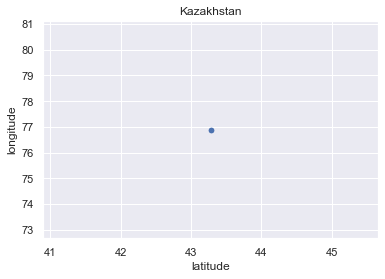

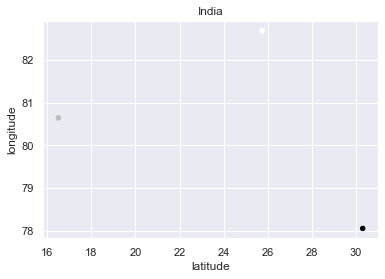

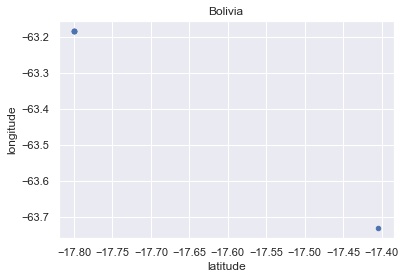

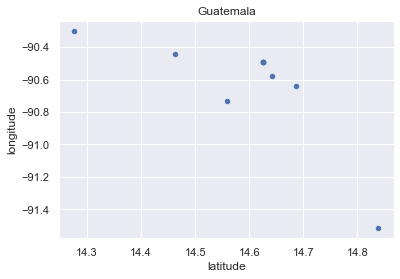

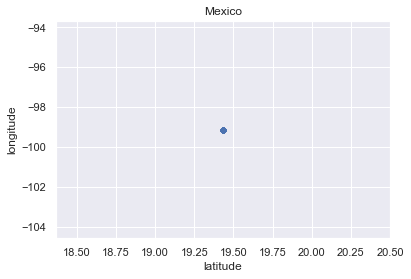

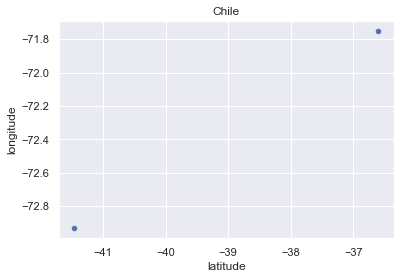

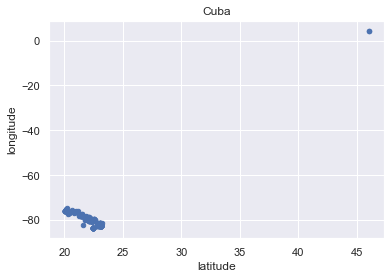

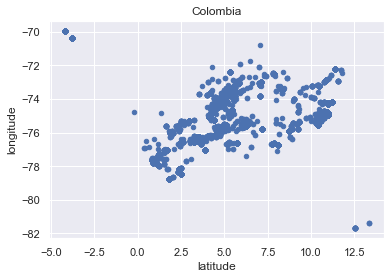

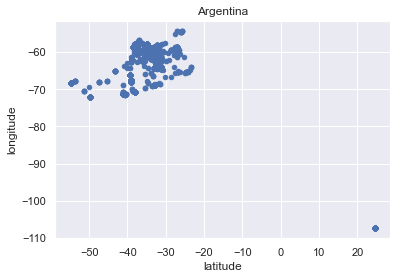

In [16]:
for country in df.country.values.unique():
    df_country = df[df.country == country]
    df_country.plot.scatter(x = 'latitude', y = 'longitude')
    plt.title(country)

    

# Clustering

In [ ]:
Y_axis = df[['latitude']]
X_axis = df[['longitude']]

In [ ]:
K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, init ='k-means++')

cluster_label = kmeans.fit_predict(df[['latitude', 'longitude']]) # Compute k-means clustering.

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

In [ ]:
df.plot.scatter(x = 'latitude', y = 'longitude', c = cluster_label, s = 50, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)